<a href="https://colab.research.google.com/github/Andrey239/ML_LPI_2021/blob/main/seminar02/MLatFIAN2021_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

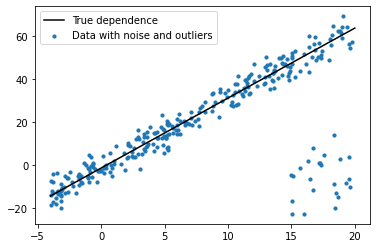

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

100%|██████████| 1000/1000 [00:00<00:00, 21261.53it/s]


3.144206659059914 -1.4219999999999977


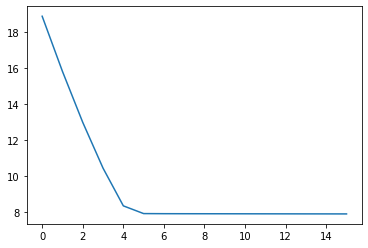

In [32]:
#@title Текст заголовка по умолчанию
from sklearn.linear_model import LinearRegression
from tqdm import trange, tqdm

##mae = 1/n sum |yi-w1x-w0|   dM/dw1 =- 1/n sum xi sign(..) DM/dw0 = - 1/n sum xi sign(..)


sign = np.zeros(dtype=float, shape=X.shape[1])
loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.1
w1=0
w0=0
# Training loop
for _ in trange(1000):
  # Your turn: calculate the gradient of MSE with respect to w:
  #grad = 2/N x^T(Xw-y)
  sign = -np.sign(y[:,None]-w1*X-w0) 
  w1 -= learning_rate * ((sign[:,0]*X[:,0]).mean())
  w0 -= learning_rate * ((sign).mean()) 

  # Gradient descent step
  #w -= learning_rate * gradient

  # Calculate and record the new loss value
  loss_values.append(
     np.abs(y[:,None]-w1*X-w0).mean()
  )

# Plotting the evolution of loss values

plt.plot(loss_values[:16], label = 'evolution');
plt.legend
plt.show
print(w1,w0)







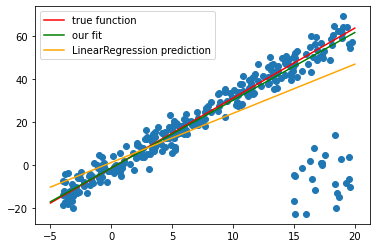

In [33]:

##linear regression part

model = LinearRegression()

model.fit(X, y)

x = np.linspace(-5, 20, 101)
plt.plot(x, true_function(x),color = 'red', label='true function')
plt.plot(x, x*w1+w0,color = 'green', label = 'our fit')
plt.scatter(X, y);
plt.plot(x, model.predict(x[:,None]), color = 'orange', label='LinearRegression prediction')
plt.legend()

Наш результат очень хорошо совпадает с функцией, а linear regression - нет. Думаю это связано с тем, что мы работаем с модулем отклонения, а regression с его квадратом и вклад отдельно стоящего кластера точек у нее выше